In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('boston_housing.csv')

In [4]:
data.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
data.shape

(506, 15)

In [6]:
data.drop(columns=['Unnamed: 0'],inplace=True)

In [7]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [19]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [20]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Data Visualisation

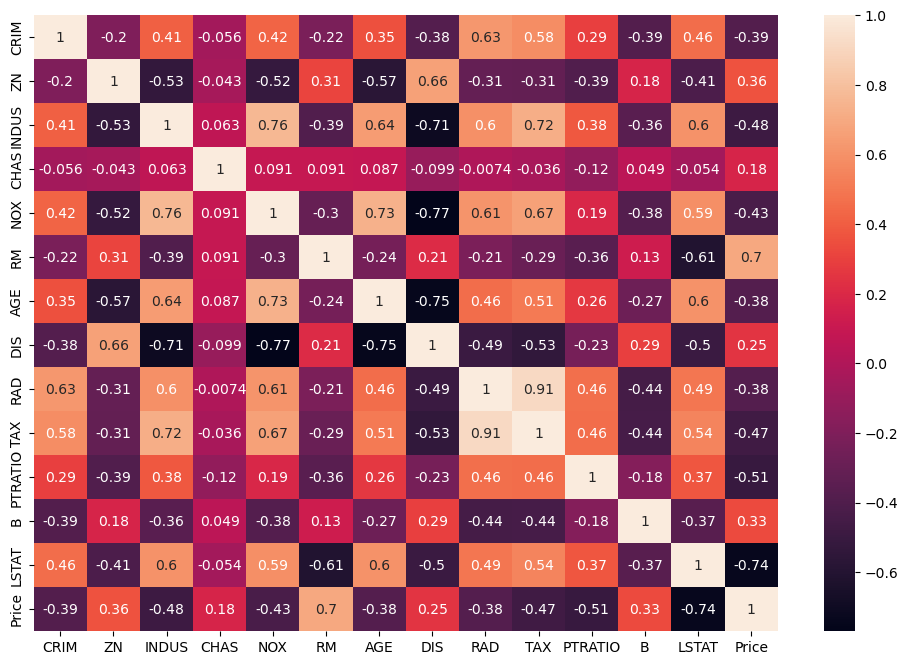

In [21]:
corr = data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True)
plt.show()

<Axes: xlabel='Price', ylabel='Count'>

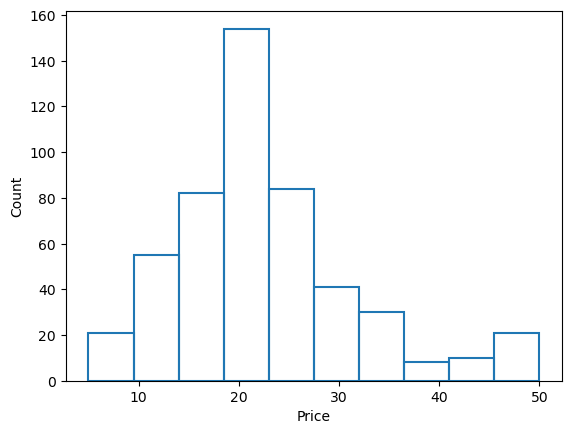

In [22]:
sns.histplot(data=data,x='Price',bins=10,fill=False)

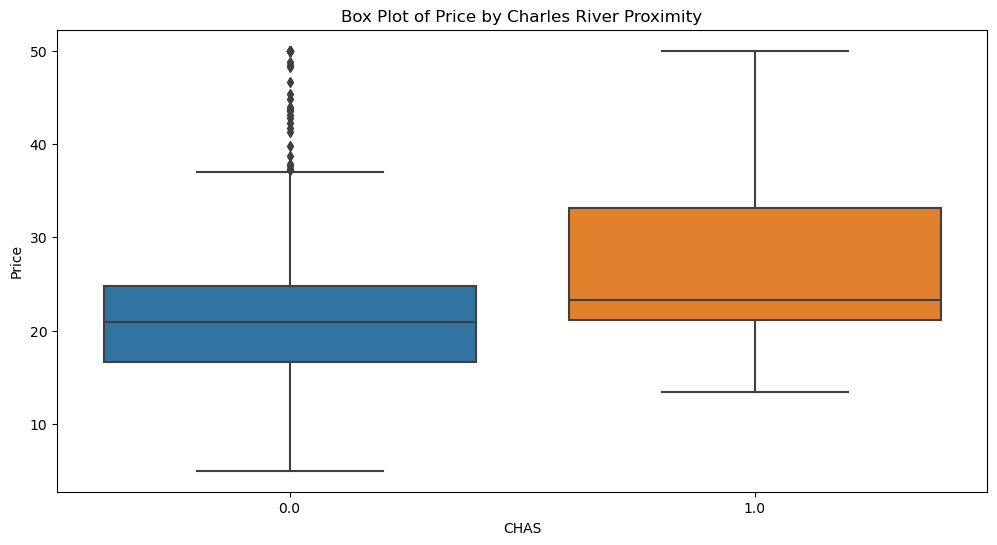

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x="CHAS", y="Price")
plt.title("Box Plot of Price by Charles River Proximity")
plt.show()

In [24]:
median_price = data["Price"].median()
data["Price_Class"] = data["Price"].apply(lambda x: 1 if x >= median_price else 0)

In [25]:
X = data[["RM"]]
y = data["Price_Class"]

In [26]:
X.head()

,RM
0,6.575
1,6.421
2,7.185
3,6.998
4,7.147


In [27]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Price_Class, dtype: int64

In [72]:
print('The shape of X is: ',X.shape)
print('The shape of Y is: ',y.shape)

The shape of X is:  (506, 1)
The shape of Y is:  (506,)


In [73]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
X_transform = min_max.fit_transform(X)
X = pd.DataFrame(X_transform, columns = X.columns)

In [74]:
X_transform

array([[0.57750527],
       [0.5479977 ],
       [0.6943859 ],
       [0.65855528],
       [0.68710481],
       [0.54972217],
       [0.4696302 ],
       [0.50028741],
       [0.39662771],
       [0.46809734],
       [0.53956697],
       [0.46905537],
       [0.44606246],
       [0.45755892],
       [0.48572523],
       [0.43552405],
       [0.45487641],
       [0.46541483],
       [0.36309638],
       [0.41502203],
       [0.38493964],
       [0.46062464],
       [0.49453918],
       [0.43150029],
       [0.45276873],
       [0.39049626],
       [0.43150029],
       [0.47633646],
       [0.56217666],
       [0.59647442],
       [0.41233953],
       [0.48112665],
       [0.45775053],
       [0.41004024],
       [0.48572523],
       [0.4544932 ],
       [0.4368653 ],
       [0.43858977],
       [0.46081625],
       [0.58133742],
       [0.66353708],
       [0.61486875],
       [0.49971259],
       [0.50776011],
       [0.48055183],
       [0.40639969],
       [0.42632688],
       [0.473

In [75]:
X_transform.ndim

2

In [76]:
X_transform.shape

(506, 1)

In [77]:
X.head()

,RM
0,0.577505
1,0.547998
2,0.694386
3,0.658555
4,0.687105


In [78]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y =train_test_split(X, y, random_state=42, test_size =0.2)

In [79]:
print('Training data X :',train_x.shape)
print('Training data y: ',train_y.shape)

Training data X : (404, 1)
Training data y:  (404,)


In [80]:
print('Testing data X :',test_x.shape)
print('Testing data y: ',test_y.shape)

Testing data X : (102, 1)
Testing data y:  (102,)


In [81]:
print('The distribution of targeted variables in train data: ', train_y.value_counts()/len(train_y))
print('The distribution of targeted variables in test data: ', test_y.value_counts()/len(test_y))

The distribution of targeted variables in train data:  1    0.522277
0    0.477723
Name: Price_Class, dtype: float64
The distribution of targeted variables in test data:  0    0.568627
1    0.431373
Name: Price_Class, dtype: float64


In [82]:
grid_param = {
    
    'n_neighbors': range(2,50,2),
    'weights':['uniform'],
    'metric':['minkowski','euclidean','manhattan','hamming'],
    'algorithm':['auto','ball_tree','kd_tree','brute']
}

In [83]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

In [84]:
knn = KNeighborsClassifier()
grid1 = RandomizedSearchCV(knn,grid_param,verbose=3,cv=5,n_jobs=-1)

In [85]:
grid1

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'metric': ['minkowski', 'euclidean',
                                                   'manhattan', 'hamming'],
                                        'n_neighbors': range(2, 50, 2),
                                        'weights': ['uniform']},
                   verbose=3)

In [86]:
grid_result = grid1.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 215, in fit
    return self._fit(X, y)
  File "C:\Users\Hp\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 493, in _fit
    self._check_algorithm_metric()
  File "C:\Users\Hp\anaconda3\lib\site-packages\sklearn\n

In [87]:
grid_result.best_params_

{'weights': 'uniform',
 'n_neighbors': 44,
 'metric': 'manhattan',
 'algorithm': 'auto'}

In [88]:
grid_result.best_score_

0.7332556785090273

In [89]:
KNN = KNeighborsClassifier(n_neighbors=44,metric='manhattan',weights='uniform',algorithm='auto')
KNN.fit(train_x,train_y)

KNeighborsClassifier(metric='manhattan', n_neighbors=44)

In [92]:
from sklearn.metrics import accuracy_score

pred1 = KNN.predict(test_x)
acc1 = accuracy_score(pred1,test_y)
print("The accuracy score is",acc1)

The accuracy score is 0.7352941176470589


In [93]:
pred2 = KNN.predict(train_x)
acc2 = accuracy_score(pred2,train_y)
print("The accuracy score is",acc2)

The accuracy score is 0.7351485148514851


In [95]:
y.value_counts()

1    255
0    251
Name: Price_Class, dtype: int64

## Confusion Matrix

In [96]:
from sklearn.metrics import confusion_matrix

In [98]:
cm = confusion_matrix(test_y,pred1)

In [99]:
cm

array([[42, 16],
       [11, 33]], dtype=int64)

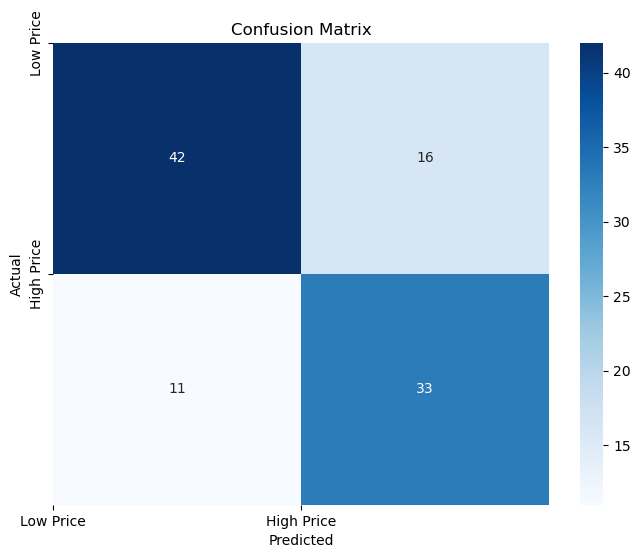

In [101]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks([0, 1], ["Low Price", "High Price"])
plt.yticks([0, 1], ["Low Price", "High Price"])
plt.show()

In [102]:
from sklearn.metrics import classification_report
print(classification_report(pred1,test_y))

              precision    recall  f1-score   support

           0       0.72      0.79      0.76        53
           1       0.75      0.67      0.71        49

    accuracy                           0.74       102
   macro avg       0.74      0.73      0.73       102
weighted avg       0.74      0.74      0.73       102



In [103]:
from sklearn.metrics import f1_score
result_f1 = f1_score(test_y,pred1)
result_f1

0.7096774193548386

In [104]:
from sklearn.metrics import precision_score
result_f1 = precision_score(test_y,pred1)
result_f1

0.673469387755102

In [105]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
y_pred_proba = KNN.predict_proba(test_x)[:,1]
fpr,tpr,thr = roc_curve(test_y,y_pred_proba)

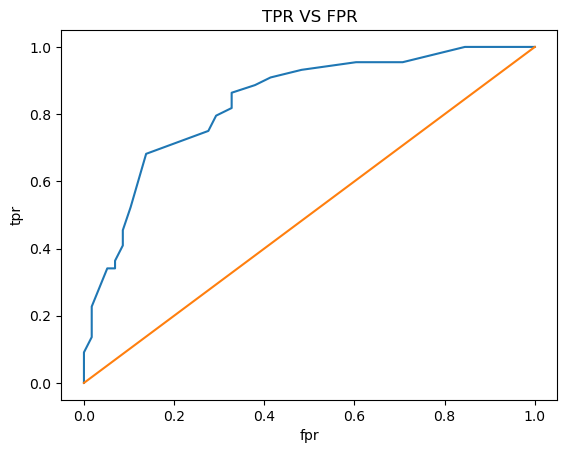

In [106]:
plt.plot(fpr,tpr,label='KNN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('TPR VS FPR')
plt.plot([0,1],[0,1])
plt.show()

In [107]:
from sklearn.metrics import log_loss
result_logloss = log_loss(test_y,pred1)
result_logloss

9.540967073589833

In [110]:
logloss = log_loss(test_y,y_pred_proba)
logloss

0.515466659807501

## Regression

In [112]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

In [114]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_x)
X_test_scaled = scaler.transform(test_x)

In [116]:
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train_scaled, train_y)

KNeighborsRegressor()

In [117]:
# Predict
y_pred = knn_regressor.predict(X_test_scaled)

In [119]:
# Calculate R-squared error
r_squared = r2_score(test_y, y_pred)
print(f"R-squared: {r_squared:.2f}")

R-squared: 0.09


In [122]:
# Calculate adjusted R-squared error
n = len(test_x)
k = test_x.shape[1]  # Number of predictors
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - k - 1)

print(f"R-squared: {r_squared:.2f}")
print(f"Adjusted R-squared: {adjusted_r_squared:.2f}")

R-squared: 0.09
Adjusted R-squared: 0.08


In [123]:
from sklearn.metrics import mean_absolute_error

In [124]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test_y, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")

Mean Absolute Error: 0.37


In [126]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test_y, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse:.2f}")

Root Mean Squared Error: 0.47


In [127]:
from sklearn.metrics import mean_squared_log_error

# Apply logarithm to predicted and actual values
y_pred_log = np.log1p(y_pred)
y_test_log = np.log1p(test_y)

# Calculate Root Mean Squared Logarithmic Error (RMSLE)
rmsle = np.sqrt(mean_squared_log_error(y_test_log, y_pred_log))
print(f"Root Mean Squared Logarithmic Error: {rmsle:.4f}")

Root Mean Squared Logarithmic Error: 0.2574


## Linear Regression

In [36]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price,Price_Class
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,1
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,1
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,1


In [37]:
# Split the data into features (X) and target variable (y)
X = data.drop("Price", axis=1)
y = data["Price"]

In [38]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price_Class
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,1
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,1
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,1
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,1
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,1


In [39]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64

In [45]:
X.shape

(506, 14)

In [46]:
y.shape

(506,)

In [48]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [50]:
LR = LinearRegression()

In [51]:
LR.fit(x_train,y_train)

LinearRegression()

In [52]:
from sklearn.metrics import mean_squared_error

In [53]:
test_predict = LR.predict(x_test)
error_score_test = np.sqrt(mean_squared_error(y_test,test_predict))
print('The mean squared error is: ',error_score_test)

The mean squared error is:  6.53832084922458


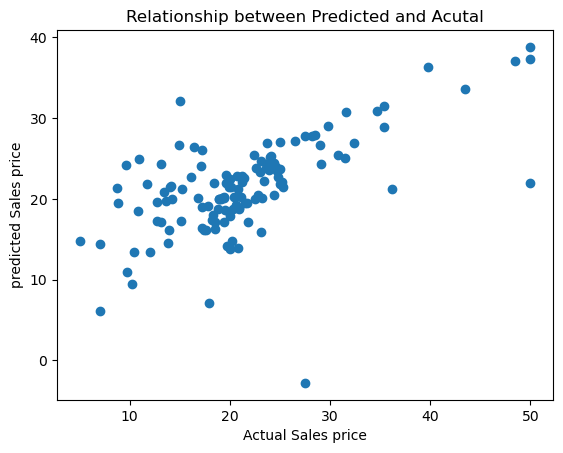

In [54]:
plt.scatter(y_test,test_predict)
plt.xlabel('Actual Sales price')
plt.ylabel('predicted Sales price')
plt.title('Relationship between Predicted and Acutal')
plt.show()

In [55]:
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as sfa

In [58]:
L1 = LinearRegression()
sfa1 = sfa(L1,k_features=7,forward=False,verbose=1,scoring='neg_mean_squared_error')

In [61]:
sfa_fit = sfa1.fit(X,y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished
Features: 13/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished
Features: 12/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.1s finished
Features: 11/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.1s finished
Features: 10/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
Features: 9/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s finished
Features: 8/7[Parallel(n_

In [62]:
feature_names = list(sfa_fit.k_feature_names_)

In [63]:
print('the features of linear model is: ',feature_names)

the features of linear model is:  ['ZN', 'NOX', 'AGE', 'DIS', 'PTRATIO', 'LSTAT', 'Price_Class']


In [65]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state= 42, test_size=0.25)

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [68]:
from sklearn.metrics import mean_squared_error

In [69]:
test_predict = LR.predict(x_test)
error_score_test = np.sqrt(mean_squared_error(y_test,test_predict))
print('The mean squared error is: ',error_score_test)

The mean squared error is:  4.461892709433883


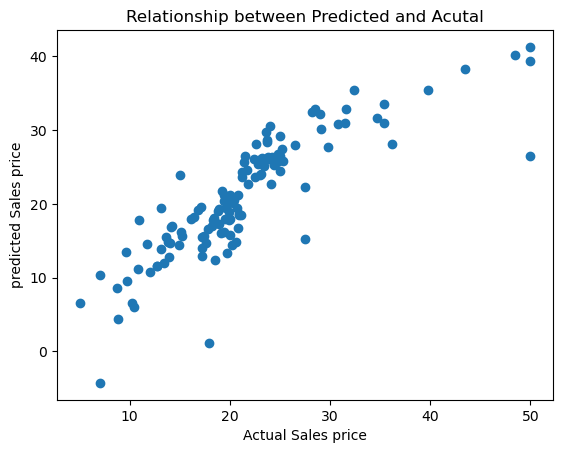

In [70]:
plt.scatter(y_test,test_predict)
plt.xlabel('Actual Sales price')
plt.ylabel('predicted Sales price')
plt.title('Relationship between Predicted and Acutal')
plt.show()